---
---

# Árboles de Decisión y KNN

---
---

Nicolás De la Fuente

## 0.- Cargar librerías y explicar sus usos (2 ptos.): 

Se utilizaron las librerías de Pandas, Numpy, Seaborn, Matplotlib y Sklearn. 
Pandas se utilizó para la lectura del archivo .CSV, la visualización del data frame y las estadísticas asociadas, observar los tipos de datos, para la limpieza de datos nulos y la homogeneización. Numpy se utilizó para calcular promedio y utilizar su módulo .where en la búsqueda del mejor K para el modelo KNN.Seaborn para graficar y matplotlib para personalizar los gráficos y visualizarlos. Sklearn se utilizó para la normalización de los datos, su método train_test_plit para separar los datos en grupos de entrenamiento del modelo y otro set para testear el modelo, KNeighborsClassifier para crear el modelo KNN y definir los hiperparametros, accuracy_score nos permite calcular el porcentaje de acierto del modelo, DecisionTreeClassifier para crear el modelo de árbol de decisión y el módulo tree para visualizar el árbol de decisiones.

In [1]:
import pandas as pd

In [2]:
%pip install seaborn

In [3]:
import seaborn as sb

In [4]:
from sklearn import preprocessing as skpr

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
from sklearn import tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

## 1.- Cargar datasets y explorar los datos. Explicar las características de los dataset (estadísticas, datos Nan, datos únicos, etc.) (5 ptos.):

Empezamos utilizando el método .read_csv() de Pandas para la lectura del archivo.
luego hacemos el análisis exploratorio de los datos, con .head() visualizamos las primeras filas del data frame, utilizamos .describe(include= "object") para ver las estadísticas asociadas a los datos de tipo string y .describe() para los tipos int, set.columns para ver los atributos del set, set.dtypes para visualizar los tipos de datos en cada atributo set.isna().sum() para ver cuantos elementos tipo "NaN", "NaT" y "None" hay en nuestro data frame, en este caso no tenemos, también usamos set.duplicated().sum() para ver si tenemos datos duplicados, tampoco tenemos datos duplicados. También iteramos en cada atributo para encontrar valores "unknown", en este caso no hay valores "unknown" en atributos tipo int pero el atributo "poutcome" tiene 3705 datos "unknown" que representan aproximadamente el 82% de la data, por lo que más adelante eliminaremos este atributo, también el 30% de los datos del atributo "contact" son "unknowns. Por último seleccionamos los atributos tipo int para ver si existe alguna correlación entre ellos, no encontramos correlación

In [12]:
set = pd.read_csv("bank.csv", sep = ";")

In [13]:
set.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [14]:
set.describe(include= "object")

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [15]:
set.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [16]:
set.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [17]:
set.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [18]:
set.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
set.duplicated().sum()

0

In [20]:
encabezados = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
               'previous', 'poutcome', 'y']
for x in encabezados:
    count = 0
    for i in set[x]:
        if i == "unknown":
            count += 1
        else:
            continue
    porcentaje = (count/set[x].count())*100
    print(f"{x}: {count} datos unknown que representan el {porcentaje}%")

age: 0 datos unknown que representan el 0.0%
job: 38 datos unknown que representan el 0.8405220084052201%
marital: 0 datos unknown que representan el 0.0%
education: 187 datos unknown que representan el 4.13625304136253%
default: 0 datos unknown que representan el 0.0%
balance: 0 datos unknown que representan el 0.0%
housing: 0 datos unknown que representan el 0.0%
loan: 0 datos unknown que representan el 0.0%
contact: 1324 datos unknown que representan el 29.285556292855563%
day: 0 datos unknown que representan el 0.0%
month: 0 datos unknown que representan el 0.0%
duration: 0 datos unknown que representan el 0.0%
campaign: 0 datos unknown que representan el 0.0%
pdays: 0 datos unknown que representan el 0.0%
previous: 0 datos unknown que representan el 0.0%
poutcome: 3705 datos unknown que representan el 81.95089581950896%
y: 0 datos unknown que representan el 0.0%


In [21]:
set.loc[:,['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
               'previous']].corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


## 2.- Generar dos graficos que caractericen los datos y explicarlos (5 ptos.):

Apoyarse en la documentación de Matplotlib https://matplotlib.org/ y Seaborn https://seaborn.pydata.org/index.html 

Respuesta:
---
    
Empezamos visualizando las estadísticas del atributo "balance" donde vemos que el valor mínimo es de -3313 y el máximo de 71188, con promedio de 1422, mediana de 444 y desviación estándar de 3009, lo cual ya nos muestra una distribución algo sesgada a los valores más pequeños, por ende use un gráfico de dispersión de la librería Seaborn para ver la distribución, corroborando lo comentado.
    
El segundo gráfico muestra una matriz de diagramas de dispersión, que nos permite determinar visualmente si existe una correlación entre múltiples variables, ya calculamos en el paso anterior la correlación de los atributos tipo int y no vimos buenos valore, en este caso confirmamos gráficamente que no existen correlaciones, además permite ver si existe agrupación de datos al elegir un atributo categórico, en este caso elegí el estado civil que muestra tres poblaciones casado, soltero o divorciado, en ninguno de los gráficos vemos agrupación definida de las poblaciones, y por último los gráficos en diagonal nos muestran la distribución de los datos agrupados en las tres poblaciones.

In [22]:
set["balance"].describe()

count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64

<ipython-input-23-97f17afdf504>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(a=set["balance"])


<AxesSubplot:xlabel='balance', ylabel='Density'>

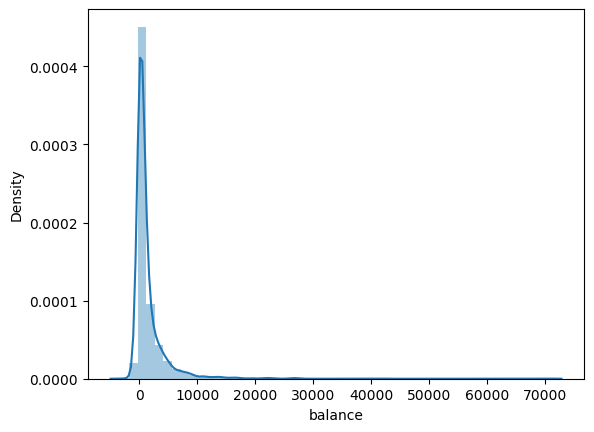

In [23]:
sb.distplot(a=set["balance"])

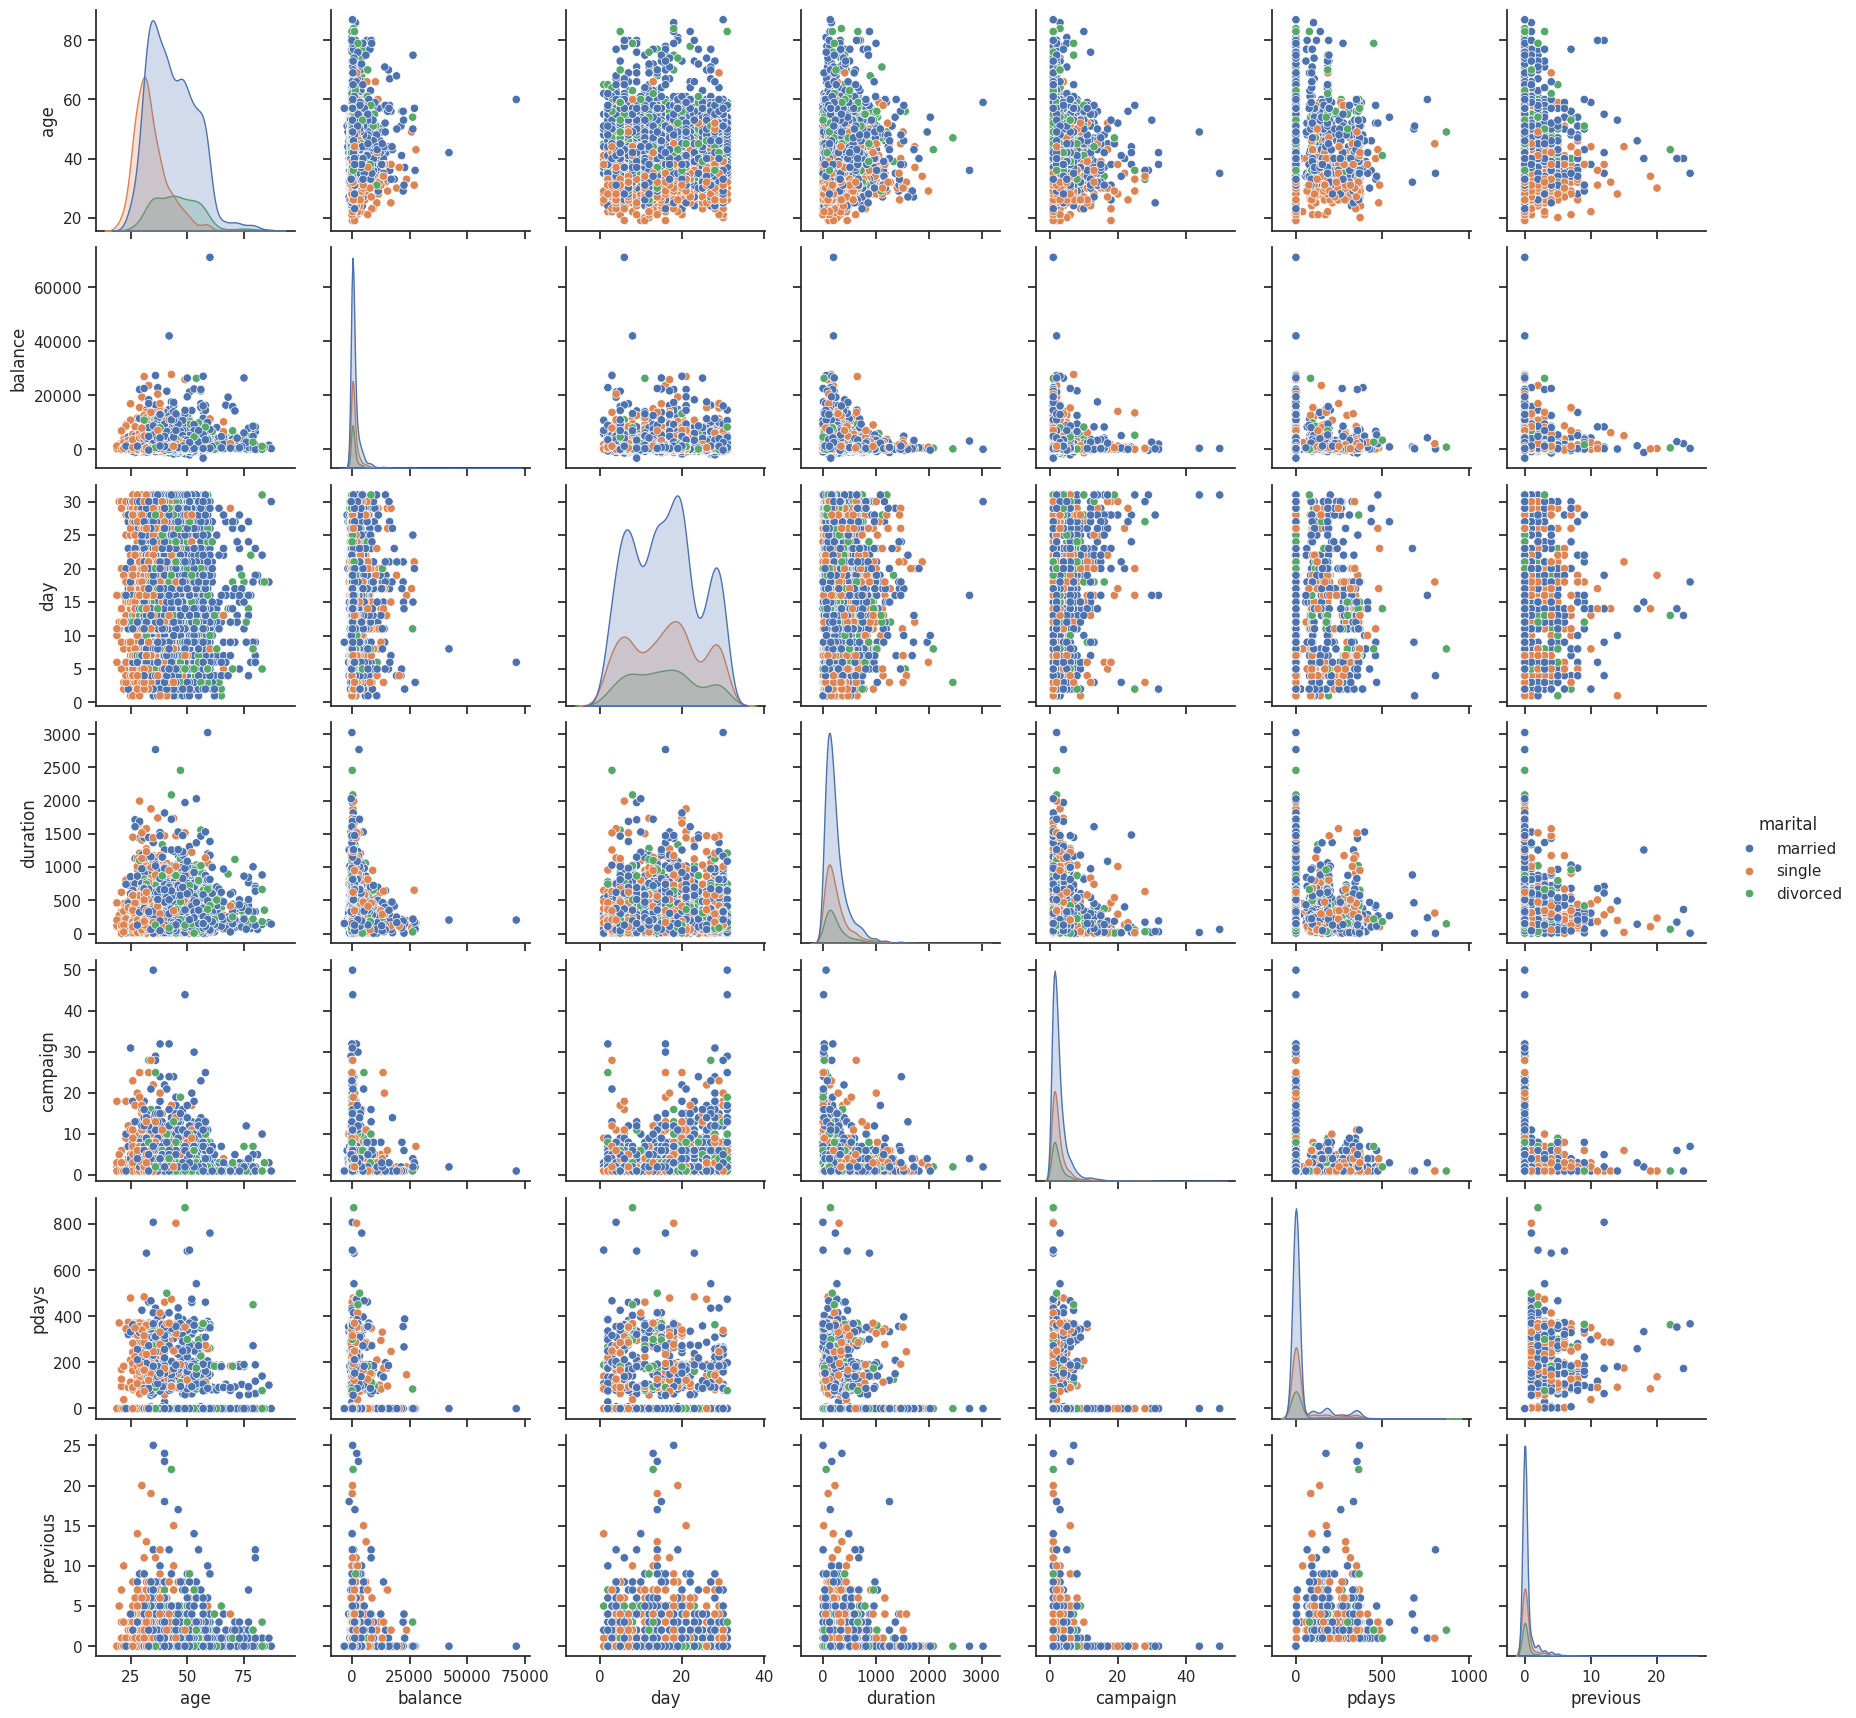

In [24]:
sb.set_theme(style="ticks")
sb.pairplot(set, hue="marital")

## 3.- Limpiar dataset, trabajar missing data, homogeneizar datos.
## Explicar las decisiones tomadas y los pasos realizados (10 ptos.):

Apoyarse en la documentación de Pandas para los distintos tipos de uniones https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Respuesta:
---
ya visualizamos que no tenemos datos nulos, entonces como ya mencionamos eliminamos el atributo de "poutcome" ya que el 82% de los datos son "unknown", tambien note que en el atributo "pdays" aquellas personas que fueron contactadas por primera vez se les asignó el valor de -1, entonces para tener todos los valores de este atributo en positivo primero confirme que no existan valores 0 y reemplace los valores -1 por 0. 

In [25]:
set = set.drop(columns="poutcome")

In [26]:
x=0
for i in set["pdays"]:
    if i == 0:
        x +=1
print(x)

0


In [27]:
set["pdays"] = set["pdays"].replace(-1, 0)

In [28]:
set.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,0,0,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,0,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,0,0,no


## 4.- Transformar datos a numérico, generar matriz de atributos, generar vector de label y normalizar los datos, explicar el tipo de normalización utilizada (recordar que es normalización de datos y no normalización de base de datos, i.e. Standard Scaler, MinMax Scaler, etc.) 
## Explicar las decisiones tomadas y los pasos realizados (18 ptos.):


Apoyarse en la documentación de Scikit-Learn para los distintos tipos de normalización de datos https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

Respuesta:
---
    
    
Para empezar la normalización, decidí crear una copia del data frame para no seguir modificando el original. luego hice la codificación de los atributos categóricos, cree una lista con los nombres de cada atributo categórico del data frame y usando sklearn cree las instancias para crear el codificado e itere para ver cuántas variables categóricas tiene cada atributo, a la vez que se realizaba la codificación. Luego visualice el nuevo data frame y seleccione un atributo random para asegurarme que no hubo pérdida de datos, compare el número de categorías y su frecuencia con su contraparte en el set original.

Continúe visualizando la dispersión de mis datos previo a la normalización y se ven todas las curvas enmascaradas. Por curiosidad, para ver cómo se comportan los atributos con solo 2 categorías (0 y 1) después de su normalización por StandardScaler, ya que por MinMax deberían quedar iguales, itere para separar estos atributos y visualice en un gráfico de dispersión. Usando la librería sklearn normalize por MinMax y StandardScaler y volví a visualizar los datos. Se observó que StandardScaler agrupa a priori mejor los datos al verse todos alineados pero disminuye la densidad de la curva y genera campanas más anchas. Al visualizar los atributos con solo dos categorías se ve más claro, disminuye la densidad de la campana y además aumenta la distancia entre las dos categorías. Tener en cuenta que los modelos solo recibe como parámetro "y" valores 0 y 1, por lo cual la columna "y" se excluyo para la normalización por SatndardScaler y se concateno luego. al final se utilizó el método train_test_split de sklearn para formar los set de datos de entrenamiento y testeo, los pares "X" y "v" corresponden a los datos normalizados por MinMax y, "K" y "v" para los datos normalizados por StandardScaler.

In [29]:
setEncode = set.copy()

In [30]:
index = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'y']

In [31]:
lE = skpr.LabelEncoder()

In [32]:
for i in index:
    numCat = setEncode[i].value_counts().count()
    setEncode[i] = lE.fit_transform(setEncode[i])
    print(f"\"{i}\" tiene {numCat} categorias")

"job" tiene 12 categorias
"marital" tiene 3 categorias
"education" tiene 4 categorias
"default" tiene 2 categorias
"housing" tiene 2 categorias
"loan" tiene 2 categorias
"contact" tiene 3 categorias
"month" tiene 12 categorias
"y" tiene 2 categorias


In [33]:
setEncode.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,0,0,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,0,0,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,0,0,0


In [34]:
setEncode["job"].value_counts()

4     969
1     946
9     768
0     478
7     417
5     230
6     183
2     168
10    128
3     112
8      84
11     38
Name: job, dtype: int64

In [35]:
set["job"].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

<AxesSubplot:ylabel='Density'>

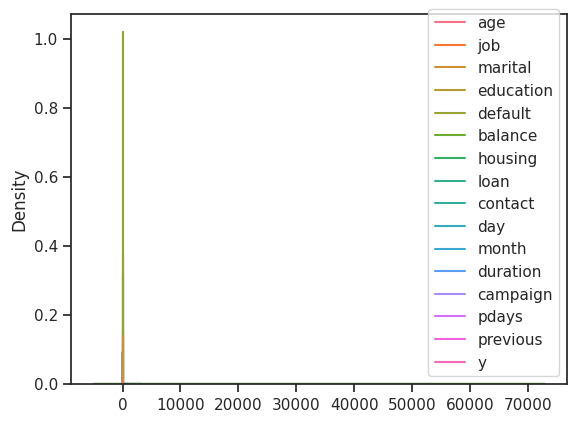

In [36]:
sb.kdeplot(setEncode)

In [37]:
col2Cat = []
colmasCat = []
for i in setEncode:
    numCat = setEncode[i].value_counts().count()
    if numCat == 2:
        col2Cat.append(i)
    else:
        colmasCat.append(i)
print(f"{col2Cat} tienen 2 categorias")
print(f"{colmasCat} tienen más de dos categorias")

['default', 'housing', 'loan', 'y'] tienen 2 categorias
['age', 'job', 'marital', 'education', 'balance', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous'] tienen más de dos categorias


In [38]:
setEncode[col2Cat].describe()

,default,housing,loan,y
count,4521.000000,4521.000000,4521.000000,4521.000000
mean,0.016810,0.566025,0.152842,0.115240
std,0.128575,0.495676,0.359875,0.319347
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Density'>

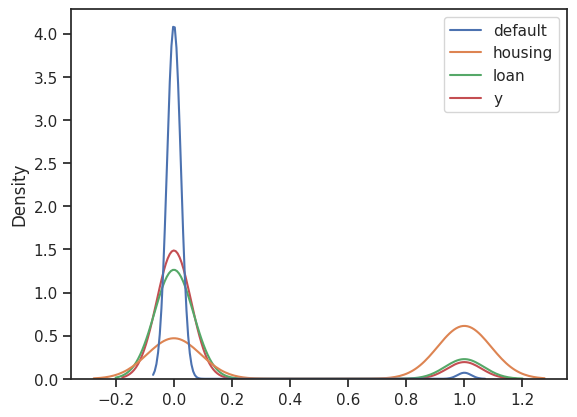

In [39]:
sb.kdeplot(setEncode[col2Cat])

In [40]:
ss_Norm = skpr.StandardScaler()

In [41]:
mm_Norm = skpr.MinMaxScaler()

In [42]:
set_Norm_MM = mm_Norm.fit_transform(setEncode)

In [43]:
set_Norm_SS = ss_Norm.fit_transform(setEncode.iloc[:,0:15])

In [44]:
set_Norm_MM = pd.DataFrame(set_Norm_MM, columns= setEncode.columns)

In [45]:
set_Norm_SS = pd.DataFrame(set_Norm_SS, columns= setEncode.iloc[:,0:15].columns)

In [46]:
set_Norm_SS = pd.concat([set_Norm_SS, setEncode["y"]], axis = 1)

<AxesSubplot:ylabel='Density'>

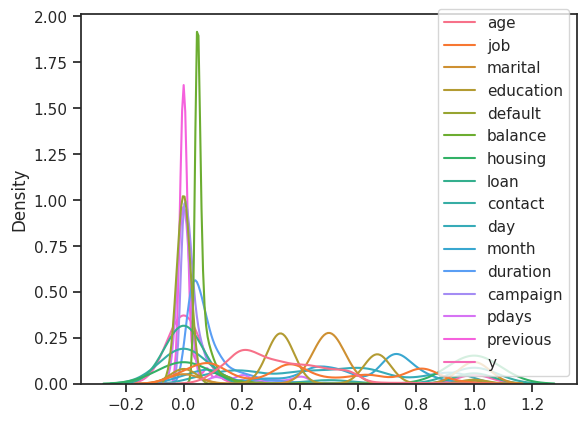

In [47]:
sb.kdeplot(set_Norm_MM)

<AxesSubplot:ylabel='Density'>

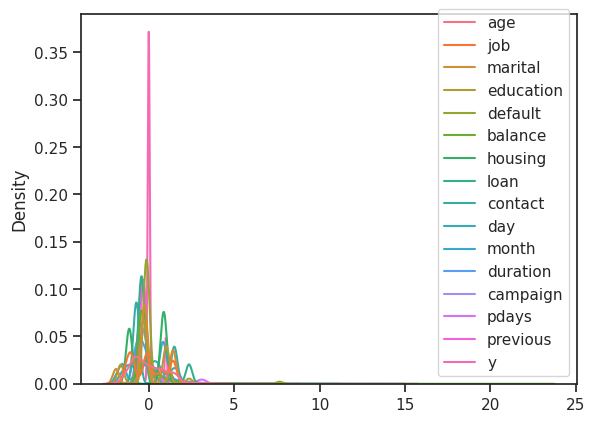

In [48]:
sb.kdeplot(set_Norm_SS)

<AxesSubplot:xlabel='loan', ylabel='Density'>

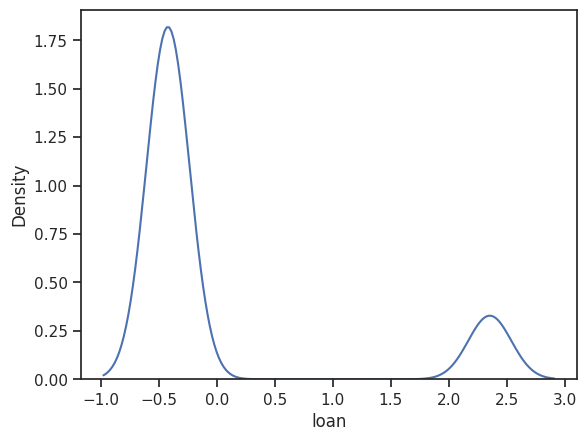

In [49]:
sb.kdeplot(set_Norm_SS["loan"])

<AxesSubplot:xlabel='loan', ylabel='Density'>

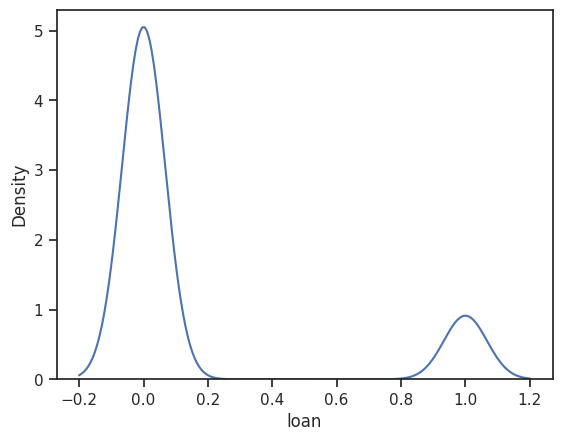

In [50]:
sb.kdeplot(set_Norm_MM["loan"])

In [51]:
y = set_Norm_MM["y"]

In [52]:
X = set_Norm_MM.iloc[:,0:15]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [54]:
v = set_Norm_SS["y"]

In [55]:
K = set_Norm_SS.iloc[:,0:15]

In [56]:
K_train, K_test, v_train, v_test = train_test_split(K,v,test_size=0.30)

## 5.- Definir algoritmo KNN con tres set de hiperparámetros diferentes (se debe escoger diferentes valores de hiperparámetros)

1.- Definir algoritmo con sus hiperparámetros.

2.- Entrenar el algoritmo.

3.- Testear el algoritmo.

## Explicar las decisiones tomadas y los pasos realizados (25 ptos.):


Apoyarse en la documentación de Scikit-Learn para KNN https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#examples-using-sklearn-neighbors-kneighborsclassifier

Respuesta:
---
    
Se utilizó la librería Sklearn para KNN, se probaron 3 algoritmos para crear los modelos, con distintos hiperparámetros: Número de vecinos (5, 30 y 8) que define el número de vecinos a utilizar en el modelo, 5 es el defaul. Algoritmo ("kd_tree" para los dos primeros y "ball_tree" para el último), Leaf_size(30, 30 y 20) el valor predeterminado es 30, P=(1, 1 y 2) valor que potencia la métrica, para = 1 utilizara manhattan_distance y para p = 2  euclidean_distance y la Métrica ('minkowski', 'minkowski' y 'euclidean') que especifica la métrica con la cual se calculara la distancia entre los vecinos. Usaremos el método knn.fit() especificando nuestros set de entrenamiento para entrenar el modelo, knn.predict() usando el set de testeo para realizar las predicciones y probar el modelo, finalmente usaremos el método accuracy_score con nuestro set de testeo "y" y las predicciones del paso anterior para calcular el porcentaje de acierto del modelo. Además esto se realizó por duplicado para ver cómo afecta la normalización al diseño, entrenamiento y testeo del modelo, de knn1 a knn3 se utilizaron para valores normalizados por MinMax y de knn4 a knn6 para valores normalizados por StandardScaler. Para ambos set de datos el segundo modelo obtuvo los mejores score de aciertos, 0.887 para los datos de MinMax y 0.890 para los datos de StandardScaler.

In [57]:
knn1 = KNeighborsClassifier(n_neighbors = 5, weights = "distance", algorithm = "kd_tree", leaf_size = 30, p=1, metric='minkowski')

In [58]:
knn2 = KNeighborsClassifier(n_neighbors = 30, weights = "distance", algorithm = "kd_tree", leaf_size = 30, p=1, metric='minkowski')

In [59]:
knn3 = KNeighborsClassifier(n_neighbors = 8, weights = "distance", algorithm = "ball_tree", leaf_size = 20, p=2, metric='euclidean')

In [60]:
knn4 = KNeighborsClassifier(n_neighbors = 5, weights = "distance", algorithm = "kd_tree", leaf_size = 30, p=1, metric='minkowski')

In [61]:
knn5 = KNeighborsClassifier(n_neighbors = 30, weights = "distance", algorithm = "kd_tree", leaf_size = 30, p=1, metric='minkowski')

In [62]:
knn6 = KNeighborsClassifier(n_neighbors = 8, weights = "distance", algorithm = "ball_tree", leaf_size = 20, p=2, metric='euclidean')

In [63]:
knn1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', p=1, weights='distance')

In [64]:
knn2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=30, p=1,
                     weights='distance')

In [65]:
knn3.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, metric='euclidean',
                     n_neighbors=8, weights='distance')

In [66]:
knn4.fit(K_train,v_train)

KNeighborsClassifier(algorithm='kd_tree', p=1, weights='distance')

In [67]:
knn5.fit(K_train,v_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=30, p=1,
                     weights='distance')

In [68]:
knn6.fit(K_train,v_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, metric='euclidean',
                     n_neighbors=8, weights='distance')

In [69]:
pred_knn1 = knn1.predict(X_test)

In [70]:
pred_knn2 = knn2.predict(X_test)

In [71]:
pred_knn3 = knn3.predict(X_test)

In [72]:
pred_knn4 = knn4.predict(K_test)

In [73]:
pred_knn5 = knn5.predict(K_test)

In [74]:
pred_knn6 = knn6.predict(K_test)

In [75]:
accuracy_score(y_test, pred_knn1)

0.8843036109064112

In [76]:
accuracy_score(y_test, pred_knn2)

0.8857774502579219

In [77]:
accuracy_score(y_test, pred_knn3)

0.8850405305821666

In [78]:
accuracy_score(v_test, pred_knn4)

0.868828297715549

In [79]:
accuracy_score(v_test, pred_knn5)

0.8717759764185704

In [80]:
accuracy_score(v_test, pred_knn6)

0.8673544583640383

## 6.- Definir algoritmo Decision Tree con tres set de hiperparámetros diferentes (se debe escoger diferentes valores de hiperparámetros)

1.- Definir algoritmo con sus hiperparámetros.

2.- Entrenar el algoritmo.

3.- Testear el algoritmo.

## Explicar las decisiones tomadas y los pasos realizados (25 ptos.):


Apoyarse en la documentación de Scikit-Learn para Decision Tree https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Respuesta:
---
Se utilizó para la confección del modelo de árbol de decisiones el método DecisionTreeClassifier() de la librería sklearn, los hiperparametros utilizados para los tres modelos son: Criterion ('entropy', 'gini', 'gini') que nos permite evaluar la calidad de las divisiones en cada nodo. Splitter ('random' para los tres modelos) que es la forma en la que se decide por la mejor división en cada nodo. Max_depth ("20" para los tres modelos) que es la profundidad máxima del árbol. Min_samples_split ("22", "4", "22") que se refiere a la mínima muestras necesarias para realizar una división del nodo. Min_samples_leaf ("11", "2", "11") número mínimo de muestras para establecer un nodo. Min_weight_fraction_leaf("0.0" para todos los modelos) y Random_state ("1234") que controla la aleatoriedad de las decisiones. Luego usamos el mismo método modelo.fit() especificando los set de entrenamiento para entrenar el modelo, para el modelo de árbol solo usaremos los set normalizados por MinMax, para probar el modelo usamos el método .predict() con el set de testeo y con accuracy_score() calculamos el porcentaje de precisión.
En este caso el primer y tercer modelo dio el mismo % de precisión, teniendo distinto hiperparametro de "criterion".

In [100]:
clf1 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=20, min_samples_split=22, min_samples_leaf=11, min_weight_fraction_leaf=0.0,  random_state=1234)

In [101]:
clf2 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=20, min_samples_split=4, min_samples_leaf=2, min_weight_fraction_leaf=0.0,  random_state=1234)

In [102]:
clf3 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=20, min_samples_split=22, min_samples_leaf=11, min_weight_fraction_leaf=0.0,  random_state=1234)

In [103]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=11,
                       min_samples_split=22, random_state=1234,
                       splitter='random')

In [104]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=4,
                       random_state=1234, splitter='random')

In [105]:
clf3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=11, min_samples_split=22,
                       random_state=1234, splitter='random')

In [106]:
pred_clf1 = clf1.predict(X_test)

In [107]:
pred_clf2 = clf2.predict(X_test)

In [108]:
pred_clf3 = clf3.predict(X_test)

In [109]:
accuracy_score(y_test, pred_clf1)

0.8938835666912307

In [110]:
accuracy_score(y_test, pred_clf2)

0.8747236551215918

In [111]:
accuracy_score(y_test, pred_clf3)

0.8960943257184967

## 7.- Realizar un gráfico para KNN

## Explicar las decisiones tomadas y los pasos realizados (5 ptos.):



Respuesta:
---
Se identificó y gráfico el error promedio que comete el modelo según el número de vecinos que utilicemos, se calculó el promedio iterando en un intervalo de 1 a 30 vecinos y se utilizó los datos provenientes de la normalización por MinMax y StandardScaler. Sin considerar el número de vecinos, se utilizaron todos los hiperparametros del segundo modelo del punto 5, que me dio mejor accuracy_score. para los datos provenientes de normalización por MinMax se obtiene el menor error cuando utilizamos 15 vecinos, en cambio los provenientes de StandardScaler a los 28 vecinos. ambas con 0.11 aprox de error.    


In [112]:
err = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = i, weights = "distance", algorithm = "kd_tree", leaf_size = 30, p=1, metric='minkowski')
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    err.append(np.mean(y_pred_i != y_test))

k_optimo = np.where(err==np.min(err))[0][0]+1
print(np.min(err))
print('Mejor k =',k_optimo)

0.11201179071481208
Mejor k = 10


Text(0, 0.5, 'Mean Error')

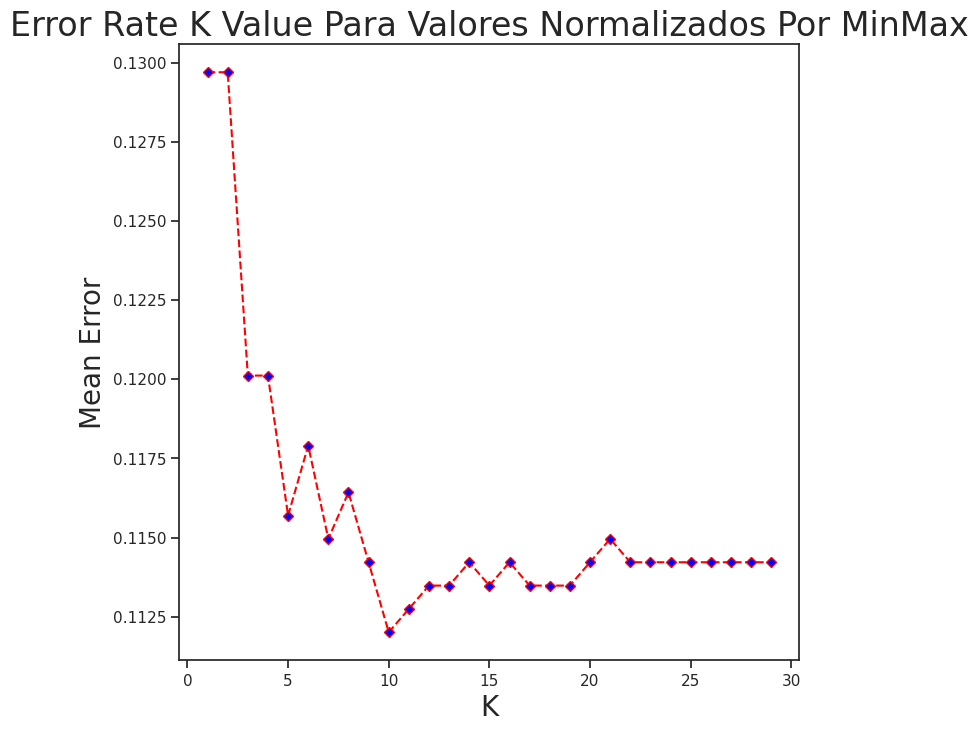

In [113]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()


ax.plot(range(1, 30), err, color='red', linestyle='dashed', marker='D',
         markerfacecolor='blue', markersize=5)
ax.set_title('Error Rate K Value Para Valores Normalizados Por MinMax',fontsize=24)
ax.set_xlabel('K',fontsize=20)
ax.set_ylabel('Mean Error',fontsize=20)

In [114]:
err1 = []

for i in range(1, 30):
    knn1 = KNeighborsClassifier(n_neighbors = i, weights = "distance", algorithm = "kd_tree", leaf_size = 30, p=1, metric='minkowski')
    knn1.fit(K_train, v_train)
    v_pred_i = knn1.predict(K_test)
    err1.append(np.mean(v_pred_i != v_test))

k1_optimo = np.where(err1==np.min(err1))[0][0]+1
print(np.min(err1))
print('Mejor k =',k1_optimo)

0.12675018422991893
Mejor k = 16


Text(0, 0.5, 'Mean Error')

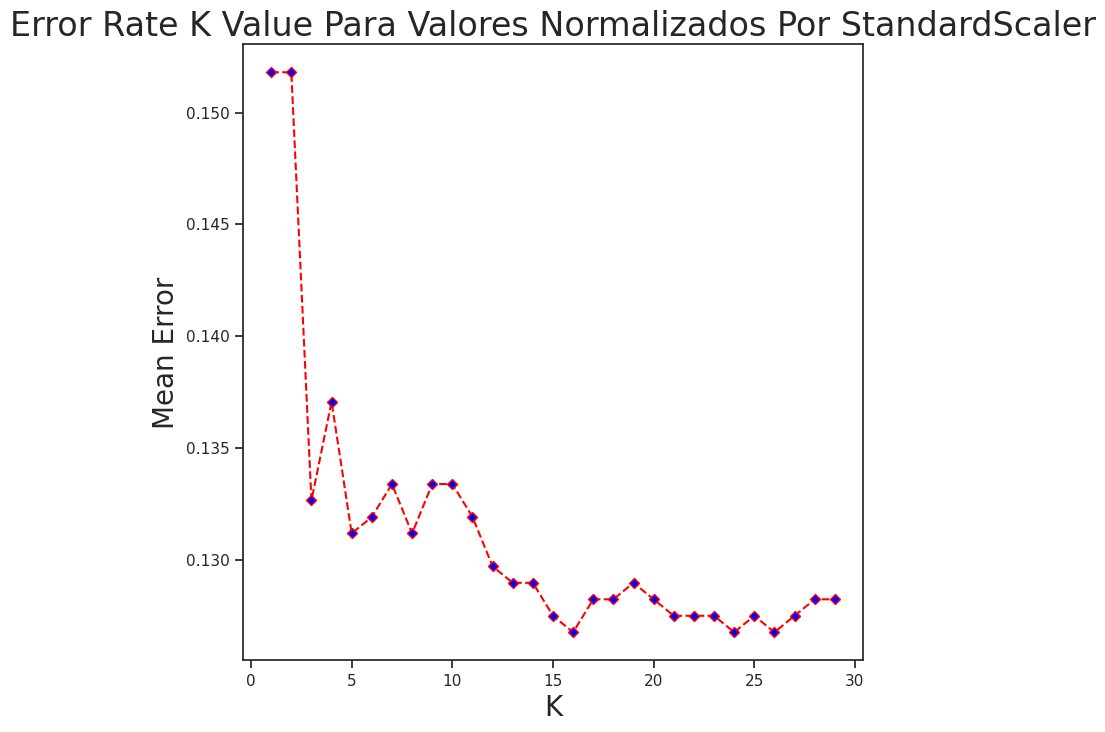

In [115]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()


ax.plot(range(1, 30), err1, color='red', linestyle='dashed', marker='D',
         markerfacecolor='blue', markersize=5)
ax.set_title('Error Rate K Value Para Valores Normalizados Por StandardScaler',fontsize=24)
ax.set_xlabel('K',fontsize=20)
ax.set_ylabel('Mean Error',fontsize=20)

## 8.- Realizar un gráfico para Decision Tree 

## Explicar las decisiones tomadas y los pasos realizados (5 ptos.):



Respuesta:
---
    
Se gráfico el peso o la importancia de los atributos utilizados en el primer árbol de decisiones, que tiene el mejor accuracy_score. Vemos que la edad es el atributo más importante para poder predecir si el cliente va a contratar un depósito a plazo, menormente el trabajo, el estado marital y el nivel de educación podrian ayudar tambien a la predicción. también utilice el método tree.plot_tree() para visualizar el árbol de decisiones. Las predicciones obtenidas desde los modelos KNN tuvieron mejor accuracy_score que utilizando un árbol de decisiones, pero estas pequeñas diferencias podrían ser insignificantes, además me di cuenta que el valor accuracy_score variará entre cada run de este archivo.

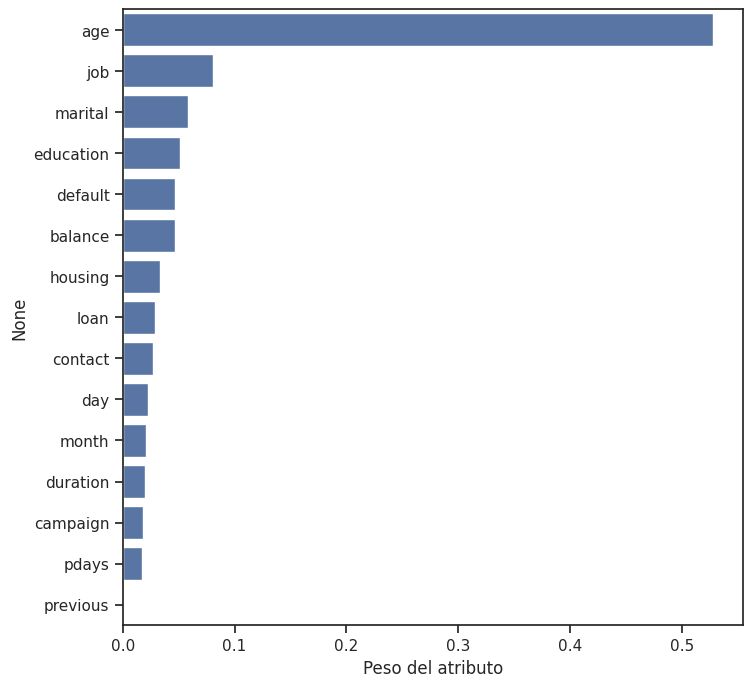

In [122]:
fig = plt.figure(figsize = (8,8))
featI = pd.Series(clf1.feature_importances_).sort_values(ascending=False)
sb.barplot(x=round(featI,4), y=X.columns[0:16])
plt.xlabel('Peso del atributo')
plt.show()

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

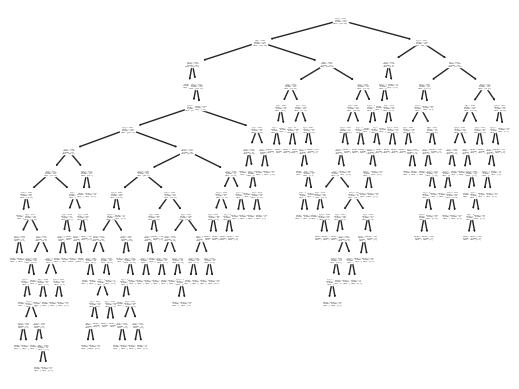

In [98]:
tree.plot_tree(clf1)
plt.figure